线性回归很简单呀！从这个词中可以看到两点，线性与回归。我们先从最简单的线性说起。

说起线，最简单的当然还是直线了。给出任意两点可以画出一条直线（当然我说的是[欧氏几何](https://en.wikipedia.org/wiki/Euclidean_geometry)）。

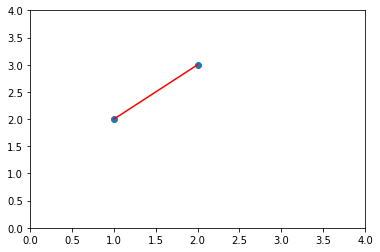

In [127]:
#encoding: utf-8
import matplotlib.pyplot as plt
''' 给出两点画一条直线 '''

x1 = [1, 2]
x2 = [2, 3]
axes = plt.gca() # get current axes
axes.set_xlim([0, 4]) # 设置 x, y 坐标的范围
axes.set_ylim([0, 4])
plt.scatter(x1, x2)
plt.plot(x1, x2, 'r')
plt.show()

那问一个简单的问题，给你三个点不共线，你还能画出过这三个点的一条直线吗？答案是否定的，因为已经说了是不共线的三点？但是如果非要画一条直线怎么办？给出一个[托马斯](https://baike.baidu.com/item/%E6%89%98%E9%A9%AC%E6%96%AF%E5%92%8C%E4%BB%96%E7%9A%84%E6%9C%8B%E5%8F%8B%E4%BB%AC/752251?fr=aladdin)的问题，假设要在美丽的[多多岛](https://baike.baidu.com/item/%E5%A4%9A%E5%A4%9A%E5%B2%9B/22098341)上的三个城市修条铁路，这三个站不共线，但是小火车又只能开直线，那么这条笔直的铁路要怎么修那？

最优的方案是修一条铁路离三个站点都是最近的，即铁路离三个站点的距离是最近的。我们怎么找到出条直线那？

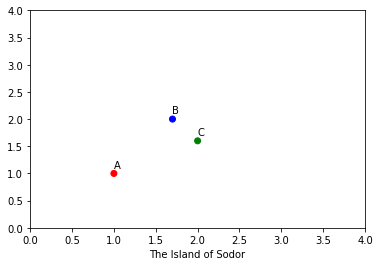

In [128]:
x1 = [1, 1.7, 2]
x2 = [1, 2, 1.6]

axes = plt.gca()
axes.set_xlim([0, 4])
axes.set_ylim([0, 4])
t = ['A', 'B', 'C']
plt.scatter(x1, x2, c=['r', 'b', 'g', 'k'])
for i in range(3):
    plt.annotate(t[i], (x1[i], x2[i] + 0.1))
plt.xlabel('The Island of Sodor')
plt.show()

下面我们尝试用线性代数中的投影矩阵知识解决这个问题。怎么用这三个点形成的向量表示一条直线，使得这条直线离这三个点最近。下面引用线性代数的投影问题。

### 投影问题
<img src="./vector projection.jpg" width="200px">

二维向量空间中，$\vec{a}, \vec{b}$ 是线性不相关的，很显然两个向量之间是无法相互表示的。如果非要用 $\vec{a}$ 来表示 $\vec{b}$ ，我们应该怎么表示那？假设我们找出向量 $\vec{p}$ 表示 $\vec{b}$，这种表示肯定是有误差的。这个误差怎么计算，可以算两个向量的 [cosine 值](https://en.wikipedia.org/wiki/Cosine_similarity)表示两个向量的差异。假设误差向量为 $\vec{e}$，那么当 $\vec{b}$ 与 $\vec{b}$垂直正交时的误差（距离）最小喽。所以看出投影问题也是解决怎么找到最小距离的问题。

下面就投影问题例下公式， 投影 $\vec{p} = \hat{x}\vec{a}$， 误差 $\vec{e} = \vec{b} - \vec{p} = \vec{b} - \hat{x}\vec{a}$。$\vec{e}$ 与 $\vec{a}$ 正交，所以有 $\vec{a}^T \cdot \vec{e} = 0$：

\begin{align}
        \vec{a} ^ T \cdot \vec{e} = 0 \\
        \vec{a} ^ T \cdot (\vec{b} - \hat{x}\vec{a}) = 0 \\
        \vec{a} ^ T \vec{b} = \hat{x} \vec{a} ^ T \vec{a} \\
        \hat{x} = \frac{\vec{a} ^ T \vec{b}} {\vec{a} ^ T \vec{a}}
\end{align}

所以，

\begin{align}
\vec{Proj}_b &= \hat{x} \cdot \vec{a} 
\\ &= \vec{a} \cdot \hat{x} 
\\ &= \vec{a} \cdot \frac{\vec{a} ^ T \vec{b}} {\vec{a} ^ T \vec{a}}  
\\ &= \frac{\vec{a} \vec{a} ^ T} {\vec{a}^ T \vec{a}} \cdot \vec{b}
\end{align}

其中 $ P = \frac{\vec{a} \cdot \vec{a} ^ T} {\vec{a}^ T  \cdot \vec{a}} $ 为投影矩阵。 $\hat{x}$, x hat 一般表示是一个估计值。

对于多多岛三个站点的问题，我们也想找到一个投影直线，使得这个投影直线离三个站点的距离都是最短的，怎么找那？假设三个站点对应的向量分别为 $\vec{a}^T = (1, 2)$, $\vec{b}^T = (2, 1.7)$, $\vec{c}^T = (3.5, 3)$。


对于一维空间一个向量求其投影问题按上式很简单，如果给一组向量怎么求其投影那? 假设一组向量组成的矩阵为 $X$ 想要表示 $\vec{y}$，怎么求出这表示？即求出  $X\vec{\theta} = \vec{y} $, 其中 $\vec{\theta} = (\theta_0, \theta_1, ...)^T$。 那么这个问题到回到线性代数最基础知识点了，即 $X\vec{\theta} = \vec{y} $ 有解吗？ 如果有解可以毫无误差的直接表示 $\vec{y}$ 了，在二维上就是可以直接画出这条直线出来。如果无解那？那就是并能直接有 $X$ 的[列子空间](https://en.wikipedia.org/wiki/Row_and_column_spaces)来表示 $\vec{y}$ 了， 在二维上就是画不出直线了。 如果不能直接表示那么我们可以找一个近似的表示吧，使得表示的误差最小。

假设用 $X\vec{\hat{\theta}}$ 表示 $\vec{y}$, 误差向量为 $X\vec{\hat{\theta}} - \vec{y}$。当误差向量与 $X$ 的列子空间正交（当然也与 $X$ 正交）时误差最小，所以有 $X^T(X\vec{\hat{\theta}} - \vec{y}) = \vec{0} $， 下面我就来求出 $\vec{\hat{\theta}}$ .

**注：** $\vec{a}$ 与 $\vec{b}$ 正交，则 $\vec{a}^T \vec{b} = \vec{b}^T \vec{a} = \vec{0}$

$$
\begin{align}
    X^T(X\vec{\hat{\theta}} - \vec{y}) &= \vec{0} \\
    X^TX\vec{\hat{\theta}} &= X^T\vec{y} \\
    \hat{\vec{\theta}} &= (X^TX)^{-1}X^T\vec{y}
\end{align}
$$

$\hat{\vec{\theta}}$ 即是我们的误差表示的最优解。些时投影为 $Proj  = X \cdot \hat{\vec{\theta}} = X \cdot (X^T X)^{-1} X ^ T \vec{y}$,  而  $ P = X \cdot (X^T X)^{-1} X ^ T$ 为投影矩阵。

## 多多岛的解决方案

下面用线性代数的最优解来解决多多岛的问题。针对这个最优问题也可能有多种方案。如规定这条直线要在 A, B 的下边，C 的上边，那可能画出的就是 Line 1, 如果规定直线要在 B 的下面，A, C 的上面，那可能画出的就是 Line 2，在如全部三点的上面下面也是可能的。

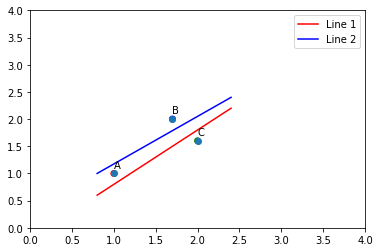

In [129]:
x1 = [1, 1.7, 2]
x2 = [1, 2, 1.6]

axes = plt.gca()
axes.set_xlim([0, 4])
axes.set_ylim([0, 4])
plt.plot([0.8, 2.4], [0.6, 2.2], c='r', label='Line 1')
plt.plot([0.8, 2.4], [1, 2.4], c='b', label='Line 2')
t = ['A', 'B', 'C']
plt.scatter(x1, x2, c=['r', 'b', 'g', 'k'])
for i in range(3):
    plt.annotate(t[i], (x1[i], x2[i] + 0.1))
plt.legend()
plt.scatter(x1, x2)
plt.show()

我们来分个类，在线上边的标记为 1，在线下边的标记为 -1。 现在解决 A, B 在线的上边、 C 在线下面的最佳直线的问题。那么这三个点的分类是 [1; 1; -1]。

我们假设这条直线为： $h(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2  = \vec{\theta^T} \vec{x}$, 其中 $x_0 = 1$。 （我们平面中见的最多的直线表示还是 $ax + by + c = 0$）.

根据上面线性代数的推导，我们可以求出最优解 $ \hat{\vec{\theta}} = (X^TX)^{-1}X^T\vec{y} $. 其中 X 就是$(x_0, x_1, x_2)$ 组成的矩阵，y = [1; 1; -1] 是三个分类的标识(label).

$$
X = \begin{bmatrix} 1 & 1 & 1\\ 1 & 1.7 & 2\\ 1 & 2 & 1.6 \end{bmatrix} 
y = \begin{bmatrix} 1 \\ 1 \\ -1  \end{bmatrix} 
$$

用 Matlab 解决这个问题, 在 Matlab 中输入下面指令算出 $\theta$

```
X = [1 1 1; 1 1.7 2; 1 2 1.6]
y = [1;1;-1]
thetas = inv(X.'*X)*X.'*y
```

最后得出： 

$$
y = \begin{bmatrix} 2.0345 \\ -3.4483 \\ 2.4138  \end{bmatrix} 
$$

所以我们的直线就是： $ -3.4483 x_1 + 2.4138 x_2 + 2.0345 = 0 $.  下面我们用 python 我解决这个问题，并且用 matplotlib 画出这条直线。顺便说一下求 $\theta$ 的方法是[最小二乘法(Least Squares Method,简记为LSE)](https://baike.baidu.com/item/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95/2522346?fr=aladdin), 而 $\theta$ 称为系数(weights).

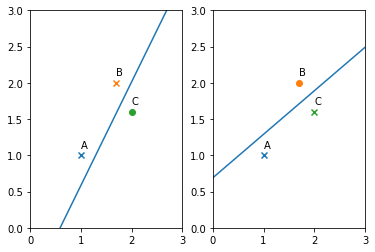

In [138]:
import numpy as np

def get_LSE_weights(yLabels):
    ''' 最小二乘法 '''
    y = np.mat(yLabels).T
    X = np.mat([[1, 1, 1], [1, 1.7, 2], [1, 2, 1.6]])
    return (X.T * X).I * X.T * y



def plotLine(ax, weights):
    x_1 = np.arange(0, 3.5, 0.1)
    x_2 = (-weights[0] - weights[1] * x_1) / weights[2] # x2 = (-w0 - w1*x1)/w2
    ax.plot(x_1, np.squeeze(np.asarray(x_2))) 


def plotIsland(ax, y):
    t = ['A', 'B', 'C']
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    x1 = [1, 1.7, 2]
    x2 = [1, 2, 1.6]
    
    for i in range(3):
        m = 'x'
        if y[i] == -1: 
            m = 'o'
        ax.scatter(x1[i], x2[i], marker=m)    
        ax.annotate(t[i], (x1[i], x2[i] + 0.1))
    
    
fig, (ax1, ax2) = plt.subplots(1, 2)



yLabels1 = [1, 1, -1]
plotIsland(ax1, yLabels1)
yLabels2 = [1, -1, 1]
plotIsland(ax2, yLabels2)

weights = get_LSE_weights(yLabels1)
plotLine(ax1, weights)

weights = get_LSE_weights(yLabels2)
plotLine(ax2, weights)

plt.show()


到目前为止，多多岛的铁路线总找到了。我们找到这条线的过程就是回归。所以到目前为止我们『线性回归』总算过了初级阶段。回归英文单词 Regression 的释义是 『an abnormal state in which development has stopped prematurely』 即只是一个不能再进化的最优解了。


### 举个栗子([源码](https://github.com/AaronFlower/MachineLearning/blob/master/04-logistic-regression/LSEReg.py))

下面这个例子的数据有只有两个特征，数据集`dataSet01.txt`的标签是 0 和  1， 而数据集 `dataSet02.txt`的标签是 -1 和 1。在两个数据集中回归出来的直线如下，可以看出两条直线的斜率一直只是位移不一致。显然，`dataSet02.txt` 拟合出来的才是我们想要的？但标签的不一致 0 与 -1 的区别为会什么会导致位移那？


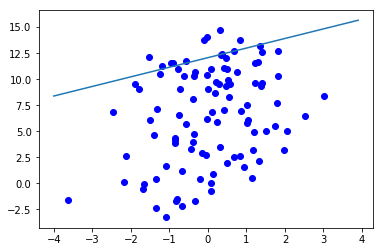

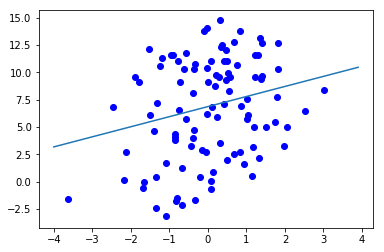

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def loadData(file):
    f = open(file, 'r')
    features = []
    labels = []
    for line in f:
        segs = line.strip().split()
        features.append([1.0, float(segs[0]), float(segs[1])])
        labels.append([int(segs[2])])
    return features, labels

def LSE_weights(features, labels):
    X = np.mat(features)
    y = np.mat(labels)
    return (X.T * X).I * X.T * y

def plotRegression(file):
    features, labels = loadData(file)
    weights = LSE_weights(features, labels)
    classes = np.unique(labels)
    fArr = np.array(features)
    lArr = np.array(labels)
    negativeMask = np.squeeze(lArr == classes[0])
    positiveMask = np.squeeze(lArr == classes[1])
    negativeSamples = fArr[negativeMask] # fancy indexing
    positiveSamples = fArr[positiveMask]
    plt.scatter(negativeSamples[:, 1], negativeSamples[:, 2], marker='o', c='b')
    plt.scatter(positiveSamples[:, 1], positiveSamples[:, 2], marker='o', c='b')
    x_1 = np.arange(-4, 4, 0.1)
    x_2 = -(weights[0] + weights[1] * x_1) / weights[2] 
    plt.plot(x_1, np.squeeze(np.asarray(x_2)))
    plt.show()


plotRegression('data/testSet01.txt')
plotRegression('data/testSet02.txt')




在下一篇，我们将介绍真正的线性回归。从机器学习的 hypothesis, cost function 出发，利用梯度算法来介绍线性回归。
天那，我好像把分类和回归给搞混了。